# Control Flow

## Objectives
By the end of this notebook, you should know:

* How to use the standard comparison operators
* How to write **`if`** statements
* What code blocks are and how indentation works
* How to write a **`for`** loop
* What types of objects are iterable
* How to write a **`while`** loop
* How to use augmented assignment statements
* How to use **`break`** and **`continue`** to gain more control within a loop
* How to write list comprehensions
* How to write nested loops

Control flow refers to the order that statements are executed in Python. The previous notebooks have all had statements execute one after another in the order that they were written. This notebook will cover **if** statements and iteration, the two most basic categories of how control flow gets manipulated by the programmer.

### Indenting and code blocks in Python
Python's syntax is so simple that it relies upon **indentation** (and not curly braces like in other languages) beneath code blocks to mark their beginning and end. `if, for, while, def, with` are all statements that have indented code blocks underneath them. A block is ended when the indentation for the current line returns to where it was before the indentation began. [PEP8](https://www.python.org/dev/peps/pep-0008/), a popular python style guide suggests 4 spaces (not tabs) for indentation. Jupyter notebooks default to 4 spaces as well and take care of it for you when you begin a code block that requires indentation.

# Booleans
Python has a boolean type with keyword values **`True`** or **`False`**. Python has six standard comparison operators
* **`>`** &nbsp;&nbsp;- greater than
* **`>=`** - greater than or equal to
* **`<`** &nbsp; -  less than
* **`<=`** - less than or equal to
* **`==`** - equal to
* **`!=`** - not equal to

All of these evaluate expressions as **`True`** or **`False`**. A single equals sign (**`=`**) is the assignment operator. Evaluate the following comparisons:

In [1]:
5 > 6 

False

In [2]:
5 >= 5

True

In [3]:
0 < 0

False

In [4]:
0 <= 0

True

In [5]:
9 == 9

True

In [6]:
10 != 10

False

### Testing if an object is `None`
We can test whether an object is **`None`** with the **`is`** operator which also always returns a boolean.

In [7]:
# can also test if a variable is None
a = 'asdf'
a is None

False

In [8]:
# a None variable
a = None
a is None

True

### More on the `is` operator
The **`is`** operator has a broader application and determines if two variables are referencing the same underlying object.

In [9]:
# can test if two variables are pointing to the same object
a = [1, 2, 3]
b = a
a is b

True

In [10]:
# same list elements but not same object
a = [1, 2, 3]
b = [1, 2, 3]
a is b

False

### The `is` operator and the `id` function
If the result of the **`is`** operator is **`True`** then we know that the two variables are referring to the exact same object. Another way of checking this is to see if each object has the same identity returned from the **`id`** function.

In [11]:
# same id
a = [1, 2, 3]
b = a
id(a), id(b)

(139891580430472, 139891580430472)

In [12]:
# same list elements but not same id
a = [1, 2, 3]
b = [1, 2, 3]
id(a), id(b)

(139891580430216, 139891580124168)

# `if` statements
**`if`** statements determine whether the subsequent block of indented code will be executed or not. A boolean expression always follows the **`if`** keyword. These boolean statements are also called **conditions**.

**`if`** statements use simple syntax with no parentheses or curly braces. A colon is placed at the end of the statement. Below it, are indented lines that get executed if the condition is true. The general format for **`if`** statements is as follows:

```
if condition:
    indented code block
    with one or
    more lines
```

The condition must evaluate to a boolean. Below is a simple condition testing whether a number is positive. If the condition evaluates to **`True`** then the number is halved and printed out. If not, no further code is run.

x = 90
if x >= 0:
    half = x / 2
    print(f'Half of {x} is {half}')

# `else` statements
If the condition in the **`if`** statement evaluates to **`False`**, an alternative set of commands may be executed with the **`else`** statement. Notice that **`else`** is at the same indentation level as **`if`** and another colon and code block follow underneath. Statements resume their linear order of execution after the else block ends.

In [13]:
x = -90
if x >= 0:
    half = x / 2
    print(f'Half of {x} is {half}')
else:
    print('Cannot take the square root of a negative number')
    
print('The code block ends after indentation returns to previous spot. This print statement gets executed no matter what')

Cannot take the square root of a negative number
The code block ends after indentation returns to previous spot. This print statement gets executed no matter what


# `elif` statements
Instead of automatically executing the **`else`** block after a false if condition, an additional condition can be tested with an **`elif`** statement. It is possible to have any number of **`elif`** statements to check any number of specific conditions. The below code checks whether an integer is divisible by several other integers using the modulus (%) operator which returns the remainder from integer division.

In [14]:
x = 47

if x % 2 == 0:
    print(f'{x} is divisible by 2 and not a prime')
elif x % 3 == 0:
    print(f'{x} is divisible by 3 and not a prime')
elif x % 5 == 0:
    print(f'{x} is divisible by 5 and not a prime')
elif x % 7 == 0:
    print(f'{x} is divisible by 7 and not a prime')
elif x % 11 == 0:
    print(f'{x} is divisible by 11 and not a prime')
else:
    print(f'{x} is not divisible by 2,3,5,7,11. It might be prime!')

47 is not divisible by 2,3,5,7,11. It might be prime!


### Multiple boolean conditions
It is possible to have any number of boolean conditions evaluated in the same expression by combining them together with **`and`** and **`or`**. For instance, all the **`if`** and **`elif`** statements in the above code can be merged into one statement. It's good practice to wrap each condition in parentheses for readability and accuracy.

In [15]:
# multiple conditions
x = 47
(x % 2 == 0) or (x % 3 == 0) or (x % 5 == 0) or (x % 7 == 0) or (x % 11 == 0)

False

In [16]:
# multiple conditions
x = 48
(x % 2 == 0) or (x % 3 == 0) or (x % 5 == 0) or (x % 7 == 0) or (x % 11 == 0)

True

### `not`  keyword
The `not` keyword reverses any boolean expression

In [17]:
not True

False

In [18]:
not 5 > 4

False

### Care with Order of operations
Expressions in parentheses happen first, followed by `not`, `and`, then `or`. The following examples show how a possible bug can arise in your code. Let's write a condition that tests whether 24 is divisible by 5 or 3.

In [19]:
# is 24 divisible by 5 or 3?
x = 24
(x % 5 == 0) or (x % 3 == 0)

True

### Correctly reversing the condition
To reverse the condition above, we need to wrap the entire expression in parentheses first.

In [20]:
# reverse the above with not. Wrap entire expression in parentheses first
x = 24
not ((x % 5 == 0) or (x % 3 == 0))

False

### Incorrectly reversing the condition
If you are unfamiliar with the order of operations you might have neglected to use the parentheses to wrap the entire expression.

In [21]:
# same as above except without outer parentheses
x = 24
not (x % 5 == 0) or (x % 3 == 0) # parentheses make a big difference!

True

### Evaluation order
The first (correct) reversal was evaluated like this:
1. `not ((x % 5 == 0) or (x % 3 == 0))`
1. `not (False or (x % 3 == 0))`
1. `not (False or True)`
1. `not True`
1. `False`

The second (incorrect) reversal was evaluated like this:

1. `not (x % 5 == 0) or (x % 3 == 0)`
1. `not False or (x % 3 == 0)`
1. `not False or True`
1. `True or False`
1. `True`

### Problem 1
<span style="color:green">Create a string that will execute the second print statement.</span> 

In [23]:
# your code here
test_string = 'hello world kukamanga' # change this string so the second print statement below is triggered

In [24]:
# trigger the second print statement
if test_string.count('a') > 4:
    print("There are more than 4 a's in your string")
elif test_string.find('k') > 10:
    print("The first k occurs after the 11th element")
else:
    print("My super intelligent responses did not find any info on your string. Please change it")

The first k occurs after the 11th element


### Problem 2
<span style="color:green">Create a different string that will execute the third print statement from above. </span> 

In [25]:
# your code here
test_string = 'hello world' # change this string so the third print statement below is triggered

In [26]:
# trigger the third print statement
if test_string.count('a') > 4:
    print("There are more than 4 a's in your string")
elif test_string.find('k') > 10:
    print("The first k occurs after the 11th element")
else:
    print("My super intelligent responses did not find any info on your string. Please change it")

My super intelligent responses did not find any info on your string. Please change it


### Problem 3
<span style="color:green">Write an expression that returns true if an integer is either greater than 10 or divisible by 7.</span> 

In [29]:
# your code here
var_int = 70
((var_int > 10) or (var_int % 7 == 0))

True

### Problem 4
<span style="color:green">Write an expression that returns true if the last character of a string is not 's'</span> 

In [32]:
test_string = 'asfdaskfjsafl'
# your code here
test_string[-1] != 's'

True

# Looping
There are two types of loops, **`for`** and **`while`**. Just as with `if` statements, `for` and `while` statements end in a colon and are followed by indented code blocks. The code block gets continually executed until all elements in the sequence have been iterated through (`for` loop) or until a condition is no longer true (`while` loop).

# `for` Loops
Python has a simple looping syntax that is a bit different than other programming languages and potentially confusing at first. You first must have an **iterable** object. [Iterable objects][1] are those that are capable of returning its members one at a time. Strings, lists, tuples, ranges, sets, and dictionaries are common iterable objects.

All **`for`** loops have the following general structure:
```
>>> for item in object:
        do something
        in this
        code block
```

The code block gets executed for every item in the iterable object. Let's see a basic example of looping through each character in a string with a **`for`** loop.

[1]: https://docs.python.org/3/glossary.html#term-iterable

In [33]:
# loop through a string
my_string = 'data'

for char in my_string:
    print(char)

d
a
t
a


### Where is `char` defined?
This simple loop above iterates over each of the 4 characters and prints out each one in its only line in its code block. The variable **`my_string`** is defined explicitly. But, the variable **`char`** doesn't appear to be defined. 

**`char`** implicitly takes on the current value of the sequence during each iteration without explicitly being assigned with the equal sign.

### The loop variable
**`char`** is also known as the **loop variable** and implicitly refers to the next character in the string.

### Name of loop variable
The name of the loop variable is entirely up to you. See the following two examples where different loop variable names are used.

In [34]:
# you can choose any variable name for the looping variable of your sequence
for character in my_string:
    print(character)
    

d
a
t
a


In [35]:
for c in my_string:
    print(c)

d
a
t
a


### Looping through a list
Loop iteration with a list happens in the exact same manner as it does with strings. The loop variable can be any name you choose and references each consecutive member of the list inside the code block.

In [36]:
# looping through a list
my_list = [1, 10, 'asf', True]

for element in my_list:
    print(element)

1
10
asf
True


### Looping through `range` objects
**`range`** objects are commonly found in **`for`** loops. A range object represents a sequence of integers that has yet to be created in the computer's memory. It differs from a list by generating the next element only when it is needed. A list generates every element and stores the entire object in memory. **`range`** objects are much more memory efficient.

In [37]:
for element in range(5):
    print(element)

0
1
2
3
4


In [38]:
for i in range(10, 13):
    print(i)

10
11
12


In [39]:
for a in range(15, 4, -3):
    print(a)

15
12
9
6


## More interesting loops
Suppose there is a list of numbers that we would like to square. One way to do this would be to create a new list, iterate through each element of the old list using a **`for`** loop, square it, and append that value to the new list.

In [40]:
a_list = [3, -2, 8, 5.3, 7]
squares = []  # initialize an empty list
for x in a_list:
    squares.append(x * x)
print(squares)

[9, 4, 64, 28.09, 49]


# Case Study: Calculating $\pi$
An interesting way to calculate the value of $\pi$ uses random numbers and the unit circle. This next section will introduce plotting code that will not be explained in detail. The point of this case study is to highlight the usefulness of looping in Python.

### Using Matplotlib to draw the unit circle
Matplotlib is the predominant plotting library in Python and what we will use during the bootcamp. We will import the library and use it to display plots for us inside the notebook. 

Let us begin by drawing the unit circle, radius of 1 centered at (0,0), inside of a square with side length of 2 also centered at (0,0).

In [41]:
# setup plotting
import matplotlib.pyplot as plt
%matplotlib inline

(-1, 1)

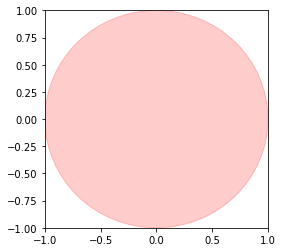

In [56]:
circle1 = plt.Circle((0, 0), 1, color='r', alpha=.2)
fig, ax = plt.subplots(figsize=(4,4))

ax.add_artist(circle1)

ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))

### Random Point In Circle
Before calculating $\pi$, let's ask a different question. What is the probability that a point (x,y) with each coordinate randomly in the range of [-1, 1] falls inside the circle.

We will estimate this probability by creating and plotting 100 points in that 2x2 square region from above. To make the analysis easier and due to symmetry, we will only use the top right quadrant of the square. We will use the random module to generate a random number from [0, 1] for each the x and y coordinates. 

To determine whether a point is inside the circle we can use the equation for the unit circle, $x^2 + y^2 <= 1$ and keep track of the number of points that meet this criteria.

In [61]:
x = 4
x ** 2

16

80 out of 100 points land in the circle


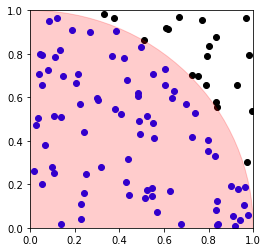

In [62]:
'''
A circle will be drawn first but only the upper right quadrant will be shown.
100 random points will be generated using a for loop.
Both x and y coordinates will be between 0 and 1.
An if statement will determine whether the point is within the circle or not
and increase a count variable.
'''
import random # this module provides functionality to generate random numbers

circle1 = plt.Circle((0, 0), 1, color='r', alpha=.2)
fig, ax = plt.subplots(figsize=(4,4)) 

ax.add_artist(circle1)
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

count = 0 # 
n = 100 # number of points

for i in range(n):
    x = random.random() # generates a random number between 0 and 1
    y = random.random()
    
    # draw the points in the circle yellow and increase the count, otherwise just draw the point
    if x ** 2 + y ** 2 <= 1:
        ax.scatter(x, y, color='blue')
        count += 1
    else:
        ax.scatter(x, y, color='black') 
print(f'{count} out of {n} points land in the circle')

### Theoretical probability of being in the circle
Instead of simulating the probability of being in the circle we can compute the exact probability since the formula for the area of a circle and square are known. 

Area of circle (in the quadrant): $\pi r^2/4$  
Area of square: 1

We calculate the probability by dividing the area of the circle by the area of the square. Since the radius is 1, the probability reduces to $\pi / 4$.

We will use the **math** module which has the exact value of $\pi$.

In [63]:
import math

math.pi / 4

0.7853981633974483

### Now to estimate $\pi$

Approximately 78.5% of randomly generated points will be inside the circle. This theoretical probability closely matches what the simulation produced.

If the value of $\pi$ were not known ahead of time we can use results of the simulation with basic algebra to calculate it. Let $p$ be the probability of a point landing in the circle based on the simulation. We simply need to multiply the proportion of points inside the cirle by 4 to get our estimate of $\pi$

In [64]:
# estimate pi from first simulation
4 * count / n

3.2

### Problem 5
<span style="color:green">To get higher decimal precision you will need to use more points. Write a loop (without drawing any figures) that calculates the value of $\pi$ to 2 decimal places using the same simulation technique as above.</span> 

In [72]:
# your code here
import random

count = 0
n = 100000

for i in range(n):
    x = random.random()
    y = random.random()

    if x**2 + y**2 <= 1:
        count+=1
pi = 4*count/n
print(pi)

3.13956


### Problem 6
<span style="color:green">Calculate the total of the squared value of each of the first 100 positive integers.</span>

In [76]:
#your code here
square_total = 0
for i in range(101):
    square_total = square_total + i**2 
square_total

338350

### Problem 7
<span style="color:green">Use a for loop to iterate over the first 10 positive integers, printing out their squared value only if the value is greater than 50</span>

In [80]:
#your code here
for i in range(11):
    square = i**2
    if square > 50:
        print(i, square)

8 64
9 81
10 100


### Problem 8
<span style="color:green">Use a for loop to iterate over every eighth integer of the first 200, appending their squared value to a list.</span>

In [82]:
squared_list = []
# your code here

for i in range(0,200,8):
    squared_list.append(i)
    
squared_list

[0,
 8,
 16,
 24,
 32,
 40,
 48,
 56,
 64,
 72,
 80,
 88,
 96,
 104,
 112,
 120,
 128,
 136,
 144,
 152,
 160,
 168,
 176,
 184,
 192]

# `while` Loops

**`while`** loops are the other looping construct that Python provides and work with the following syntax. A code block continually executes until a boolean condition evaluates to **`False`**. The condition is re-checked at the beginning of each iteration.  A while statement ends in a colon and the code block is indented.

```
>>> while condition:
        do something in this
        code block as long as condition
        evaluates as True
```

Let's see a trivial example below:

In [83]:
# Countdown from a given x
x = 5
while x >= 0:
    if x == 0:
        print("Launch!")
    else:
        print(f'{x} seconds to launch')
    x -= 1

5 seconds to launch
4 seconds to launch
3 seconds to launch
2 seconds to launch
1 seconds to launch
Launch!


## Augmented assignment statements

If you never encountered **`x -= 1`** in the above code block, you would likely be confused. This statement is a shortcut for **`x = x - 1`**. The value of **`x`** gets reduced by one and then stored back to the original variable **`x`**.  **Augmented assignment statements** such as **`-=`** reassign the variable on the left-hand side of the equation with the expanded operation on the right. 

The primary other augmented assignment statements are **`+=`**, **`*=`**, and **`/=`**. I recommend using them for only operations involving one other number, otherwise the syntax might be confusing.

### Problem 9
<span style="color:green">Multiply the variable `x` by `y` and store the result in `x` with an augmented assignment statement</span>

In [86]:
x = 5
y = 7
# your code here
x *= y
print(x)

35


# Pausing execution with the `time` module's `sleep` function

We can make the code more realistic by pausing for 1 second between iterations. Python comes included with the **`time`** module, with functionality to pause program execution. The **`sleep`** function within the time module pauses execution for a given number of seconds.

Modules and the import statement will be the subject of another notebook.

In [89]:
# Re-run this code.
import time

x = 5
while x >= 0:
    if x == 0:
        print("Launch!")
    else:
        print(f'{x} seconds to launch')
    x -= 1
    time.sleep(1)

5 seconds to launch
4 seconds to launch
3 seconds to launch
2 seconds to launch
1 seconds to launch
Launch!


# Python: Batteries Included!

A common phrase within the Python world is that Python comes with ['Batteries Included'][1]  - a phrase stolen from children's toy advertisements. There are many [standard libraries](https://docs.python.org/3/library/) that are available to Python programmers. There are also many thousands of third-party libraries available as well but the standard libraries are the core libraries that are immediately available to any developer upon installation.

[1]: https://docs.python.org/3.6/tutorial/stdlib.html#batteries-included

### Problem 10
<span style="color:green">Use a while loop to find the sum of all integers between a given postive integer and 0.</span>

In [93]:
x = 20
total = 0
# your code here
i = 1
while i <= x:
    total += i
    i += 1
print(total)

210


### Problem 11
<span style="color:green">Use a while loop to find the sum of all integers between a given integer and its square root. Use math.sqrt to find the square root. </span>

In [94]:
import math
x = 20
total = 0
# your code here
sqrt = math.sqrt(x)
while x >= sqrt:
    total += x
    x-=1
print(f'Total is {total}')

Total is 200


### Problem 12: Advanced
<span style="color:green">In this problem you will use a while loop to try and guess a randomly generated integer between 1 and 1000. The only information you will be given is whether your guess is higher or lower than the unknown integer. Your new guess will be updated in an optimal way. The optimal way to update your guess is to choose the next integer exactly half way between your current guess and the lower/upper boundary.

Steps:
1. Generate random integer
2. Generate first guess
3. Begin while loop
4. Check if guess is correct
5. Change lower and upper boundaries of guessing region based on if guess if higher/lower than unknown number
6. Keep track of number of guesses
7. Print out upper and lower boundary, the current guess and the unknown number at each iteration to track progress
8. Print out one last statement outside of the while loop that shows the guess is actually correct and the number of guesses that it took to get there.

Tips:
1. Make sure to guess an integer. Use `int` function.
</span>

In [101]:
import random

upper = 1000
lower = 1
unknown = random.randint(1, 1000) # generate unknown random integer
guess = int((upper + lower) / 2)
num_guesses = 1
#  your code here
while guess != unknown:
    print(f'Guess: {guess}, lower: {lower}, upper: {upper}, unknown: {unknown}')
    if guess > unknown:
        upper = guess - 1
    else:
        lower = guess + 1
    guess = int((lower+upper) /2)
    print(f'{lower} and {upper}')
    num_guesses += 1
print(f'the guessed number was found in {num_guesses} iterations, Guess was {guess}, Unknown was {unknown}, final lower was {lower}, final upper was {upper}')
    
    


Guess: 500, lower: 1, upper: 1000, unknown: 902
501 and 1000
Guess: 750, lower: 501, upper: 1000, unknown: 902
751 and 1000
Guess: 875, lower: 751, upper: 1000, unknown: 902
876 and 1000
Guess: 938, lower: 876, upper: 1000, unknown: 902
876 and 937
Guess: 906, lower: 876, upper: 937, unknown: 902
876 and 905
Guess: 890, lower: 876, upper: 905, unknown: 902
891 and 905
Guess: 898, lower: 891, upper: 905, unknown: 902
899 and 905
the guessed number was found in 8 iterations, Guess was 902, Unknown was 902, final lower was 899, final upper was 905


## Infinite Loops
**`while`** loops have the potential to run indefinitely if their condition always evaluates as true. For instance in the countdown example from above, if **`x`** is never decremented then the while loop will never stop. If this happens to you while running code in this notebook, you can try and stop execution by pressing the **`stop`** button in the menu bar above. If that doesn't work you can go to the terminal where you launched the notebook and press **`ctrl + c`** which should always work.

## More looping control with `continue` and `break`
**`continue`** and **`break`** are keywords that can only be used inside the body of a loop. **`continue`** forces execution to return immediately to the top of the loop for the next iteration. **`break`** exits the loop immediately without any other execution.

Let's see a simple example where we sum the numbers 0 through 99 if they are not divisible by 2 or 3.

In [102]:
# Add up only integers from 1 to 99 that are not divisible by 2 or 3
total = 0
for i in range(100):
    if (i % 2 == 0) or (i % 3 == 0):
        continue
    total += i

print("Total is {}".format(total))

Total is 1633


## `while True` then `break`
A somewhat common use of **`while`** loops is to permanently set the condition as True and make use of the **`break`** statement to stop loop iteration. This guarantees that at least one iteration will happen similar to do-while loops in other languages.

The below code will continue to generate random numbers between 0 and 1 until it a number greater than .999 is reached using the the **`while True`** then **`break`** logic. 

In [103]:
import random

In [104]:
# generate random numbers until one is greater than .999
n = 0
while True:
    n += 1
    num = random.random()
    if num > .999:
        break

# Remember, you can use the format string method to do string interpolation
print('It took {} iterations to produce number {}'.format(n, num))

It took 987 iterations to produce number 0.9994466512366416


### Problem 13
<span style="color:green">Use the `while true` logic to continually generate the roll of two 6-sided dice. Stop the loop with a break statement when the total of the current roll is 7 or 11. Use `random.randint(1, 6)` to roll a single die. Print out the number of rolls it took to get a 7 or 11. </span>

In [107]:
# your code here
count = 0
while True:
    count+=1
    dice_1 = random.randint(1,6)
    dice_2 = random.randint(1,6)
    if ((dice_1 + dice_2) == 7) or ((dice_1 + dice_2) == 11):
        print('it took {} rolls'.format(count))
        break

it took 3 rolls


### Summing up all elements in a list
There exists a **`sum`** builtin function that is most commonly used to sum up a sequence of numbers such as those in a list. Take a look at the example below and then use it in the following problem.

In [120]:
a_list = [4, 5, 3]
sum(a_list)

12

In [121]:
# also sums up ranges
sum(range(5))

10

### Problem 14
<span style="color:green">Run 100 trials, where each trial is the number of times it takes to roll two dice that sum to 7 or 11. Keep track of the result of each trial in a list. You will need nested loops for this. Then find the average number of rolls it takes using the `sum` and `len` functions on your list</span>

In [124]:
# your code here
trials = []
count = 0
run = 0
print(count)
while run < 100:
    run+=1
    while True:
        count += 1
        dice_1 = random.randint(1,6)
        dice_2 = random.randint(1,6)
        if ((dice_1 + dice_2) == 7) or ((dice_1 + dice_2) == 11):
            trials.append(count)
            count = 0
            break

average = sum(trials)/len(trials)
print('The average number of rolls to get a 7 or a 11 is {}'.format(average))

0
The average number of rolls to get a 7 or a 11 is 4.85


## Nested Loops
Occasionally it is necessary to execute a loop within a loop. The inner loop is indented further to denote its code block. When the outer loop execution reaches the inner loop, the inner loop will iterate completely before returning execution to the outer loop.

Below is a simple example of building a multiplication table with nested loops. Take notice of the print function. Normally, a new line character is printed after each print statement, but the **`end`** parameter allows you to control which character ends the print statement. 

We also introduce new functionality within the f-string. It is possible to do mathematical operations within the curly braces. Also, the **`:4`** is an option within the curly braces that specifies four spaces for the output so that each number is printed out aligned on the right.

There is quite a lot more to formatting strings in Python. There's so much to it, that they've titled it the **format specification mini-language**. For a more detailed tutorial check out [this tutorial from PyFormat](https://pyformat.info/).

In [126]:
# create a multiplication table
for row in range(1,11):
    for col in range(1, 11):
        print(f'{row * col:4}', end='')
    print()

   1   2   3   4   5   6   7   8   9  10
   2   4   6   8  10  12  14  16  18  20
   3   6   9  12  15  18  21  24  27  30
   4   8  12  16  20  24  28  32  36  40
   5  10  15  20  25  30  35  40  45  50
   6  12  18  24  30  36  42  48  54  60
   7  14  21  28  35  42  49  56  63  70
   8  16  24  32  40  48  56  64  72  80
   9  18  27  36  45  54  63  72  81  90
  10  20  30  40  50  60  70  80  90 100


# Case Study: Craps
Craps is a popular casino game that we will simulate with nested loops. The basic game is as follows: You make a wager and then roll two dice. If the sum is 2, 3 or 12 you lose and if the sum is 7 or 11 you win. If the sum is anything else, a new stage of the game starts where you continue to roll two dice until the sum is 7 in which you lose or until you roll your original number in which case you win. Any other sum is meaningless except your original roll or 7.

Condensing the logic, craps looks like this
* Let X be the sum of a roll of 2 dice
* If X is 2,3,12 (lose) or 7,11 (win) then game ends
* Else: Continue rolling dice until sum is X (win) or 7 (lose)

### Challenge before looking ahead
If you like, you can go ahead and code craps now. The tutorial will continue a step by step process of coding up the game.

In [127]:
# your code here (if you accept the challenge...)
#gonna do another time, interesting tho

## Spoiler Alert
The below steps through Craps

### Simplify Game
In order to begin coding this game, we will only consider the first two bullet points from above. Roll two dice and determine if a loss or win occurs.

In [128]:
# roll dice and determine if win or lose
die_1 = random.randint(1, 6)
die_2 = random.randint(1, 6)
total = die_1 + die_2

if total in [2, 3, 12]:
    print('You rolled {}. You lose'.format(total))
elif total in [7, 11]:
    print('You rolled {}. You win'.format(total))
else:
    print('You rolled {}. Unfinished'.format(total))

You rolled 9. Unfinished


### Second stage of game
If the original roll was not a 2,3,7,11 or 12 a new stage of the game continues until the original roll or 7 is rolled. This is a perfect situation for a while loop.

In [129]:
# Add in second stage of game
die_1 = random.randint(1, 6)
die_2 = random.randint(1, 6)
total = die_1 + die_2

if total in [2, 3, 12]:
    print('Your first roll was {}. You lose'.format(total))
elif total in [7, 11]:
    print('Your first roll was {}. You win'.format(total))
else:
    while True:
        die_1 = random.randint(1, 6)
        die_2 = random.randint(1, 6)
        new_total = die_1 + die_2
        if new_total == total:
            print('Win with original roll {} and new roll {}'.format(total, new_total))
            break
        if new_total == 7:
            print('Lose with original roll {} and new roll {}'.format(total, new_total))
            break

Win with original roll 4 and new roll 4


### Problem 15: Simulating Craps - Doubling up or going broke?
<span style="color:green">It's possible to simulate someone playing craps until a certain criteria is met. Continually play the game of craps until the balance has doubled or until the player is out of money. Use the code from above but modify it in such a way that the print statements are removed and that the balance is updated each game. Keep track of the number of games played and print this number out with the ending balance.</span>

In [130]:
balance = 500
wager = 10
games = 0
# your code here

### Problem 16
<span style="color:green">Simulate the scenario in problem 15, 1000 times and determine what percentage of the time you would end up doubling your money. Use a print statement to write out results. Is craps a good investment? (this takes a while to simulate)</span>

In [131]:
# your code here

# List comprehensions
A list comprehension is special Python syntax for creating lists. List comprehensions do not add any extra functionality to Python, they merely make for more elegant, shorter, and readable code. They are best learned through examples.

We will first show an old example of squaring a sequence of numbers and then show the same operation using a list comprehension.

In [ ]:
# square numbers 0 to 9 and put in a list
squared = []
for num in range(10):
    squared.append(num ** 2)
    
squared

### List Comprehension of the above
No additional functionality is added. Only, shorter and more compact syntax.

In [ ]:
# Use a list comprehension to do the same thing
squared = [num ** 2 for num in range(10)]
squared

### Reading list comprehensions
Understanding list comprehensions is tricky at first since the code is written opposite of how it is with a normal **`for`** loop. In basic list comprehensions, there are three parts.

1. The outer brackets, that denote a list
2. The for loop
3. Some operation

[<span style="color:green">operation</span>      <span style="color:red">for loop</span> ]

When first learning list comprehensions it might be easier to read them beginning from the **`for`** loop and then the operation. Using the example above:
```
[num ** 2 for num in range(10)]
```

We can begin reading it from the **`for`** loop which is: **`for num in range(10)`**. This tells us that the variable **`num`** will take on the values from 0 through 9. Next we look at the **operation** which is **`num ** 2`**. This squares **`num`**. The final result will be a list of the squared integers.

### Standard mathematical notation
List comprehensions resemble standard mathematical notation for sets. We can write the above list comprehension as follows in standard mathematical notation.

$$\{x^2 : x \in \{0, 1, ... , 9\} \}$$

Which is read as the set of all x squared such that x is in the set 0 to 9.

### List Comprehension Examples
Many more simple list comprehension examples will be given below

In [132]:
# add 100 to each number from 10 to 20
[x + 100 for x in range(10, 21)]

[110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]

In [133]:
# determine if the number from the integers 10 to 20 is even
[x % 2 == 0 for x in range(10, 21)]

[True, False, True, False, True, False, True, False, True, False, True]

In [134]:
# Get the last letter of every string in a list
string_list = ['list', 'comprehensions', 'can', 'be', 'confusing']
[word[-1] for word in string_list]

['t', 's', 'n', 'e', 'g']

### Problem 17
<span style="color:green">Use a list comprehension to create a list that divides each of the first 10 positive integers by 4.</span>

In [135]:
# your code here
list_comp = [x / 4 for x in range(10)]
list_comp

[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25]

### Problem 18
<span style="color:green">Use a list comprehension to create a list of the area of a circle for circles with a radius equal to the first 10 postive integers.</span>

In [137]:
import math
# your code here
list_comp = [math.pi * r ** 2 for r in range(1,11)]
list_comp

[3.141592653589793,
 12.566370614359172,
 28.274333882308138,
 50.26548245743669,
 78.53981633974483,
 113.09733552923255,
 153.93804002589985,
 201.06192982974676,
 254.46900494077323,
 314.1592653589793]

### Problem 19
<span style="color:green">Create a list of strings. Then use a list comprehension to create a list that contains the length of each of these strings.</span>

In [139]:
# your code here
my_str = ['hello', 'world', 'es', 'lol']
[len(my_str[x])for x in range(0, len(my_str))]


[5, 5, 2, 3]

# Conditional List Comprehensions
The basic list comprehension can be extended by adding a conditional statement after the for loop. This condition is evaluated at each iteration in the for loop. The 'operation' of the list comprehension only takes place if the condition is true. 

Again, we will show an example that does not use a list comprehension and then turn that example into a list comprehension.

Below, we will iterate through the first 10 integers and check if the number is odd and if it is, append its squared value to a list.

In [140]:
# square numbers 1 to 10 if number is odd and put in a list
squared_odd_nums = []
for num in range(1, 11):
    if num % 2 == 1:
        squared_odd_nums.append(num ** 2)
    
squared_odd_nums

[1, 9, 25, 49, 81]

In [ ]:
# same as above using a list comprehension
squared_odd_nums = [num ** 2 for num in range(1, 11) if num % 2 == 1]
squared_odd_nums

### Reading Conditional List Comprehensions
The conditional (which must return a boolean) is written after the for loop. The operation only occurs if this condition evaluates as True.

[<span style="color:green">operation</span> <span style="color:red">for loop</span> <span style="color:blue">condition</span>]

In standard mathematical notation

$$\{x^2 : x \in \{1, ... , 10\} \ and \ x \ is \ odd \}$$


The condition acts as a filter that each element must pass through before being operated on and appeneded to the new list.
### Conditional List Comprehension Examples Below

In [141]:
# Square the first 50 integers with the condition that the number be greater than 40
[x ** 2 for x in range(50) if x > 40]

[1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401]

In [142]:
# Get the last character of each string in a list but only if the first letter is a 't'
string_list = ['today', 'is', 'terrific', 'and', 'not', 'terrible!']

[word[-1] for word in string_list if word[0] == 't']

['y', 'c', '!']

### Problem 20
<span style="color:green">Create a list of strings. Then use a list comprehension to create a list that contains only the strings that have length greater than 5.</span>

In [145]:
# your code here
list = ['hello', 'world', 'estefania', 'testing', 'again']

[word for word in list if len(word) > 5]


['estefania', 'testing']

### Problem 21
<span style="color:green">Create a long string. Use a list comprehension to create a list of only the vowels in that string.</span>

In [146]:
# your code here
long_str ='estefaniamariaakers'
[letter for letter in long_str if letter in ['a','e','i','o','u']]

['e', 'e', 'a', 'i', 'a', 'a', 'i', 'a', 'a', 'e']

### Problem 22

<span style="color:green">Write a list comprehension that loops through all numbers between 1 and 100 and squares all those that end in 3 or 7 (hint: use modulus operator)</span>

In [149]:
# your code here
[x**2 for x in range(1,101) if x % 10 in [3,7]]

[9,
 49,
 169,
 289,
 529,
 729,
 1089,
 1369,
 1849,
 2209,
 2809,
 3249,
 3969,
 4489,
 5329,
 5929,
 6889,
 7569,
 8649,
 9409]

# Conditional assignments in one line
Python has more 'syntactic sugar' (code that is simpler to write, easier to read and thus 'sweeter', but doesn't add functionality) by allowing if/then/else statements in one line. The [ternary operator](https://en.wikipedia.org/wiki/%3F:#Python) is a one line statement that assigns a variable the value of the first expression if a condition is true otherwise it gets assigned the latter value.

As was done in list comprehensions above, an example will be done with and without the new syntax.

In [150]:
# old syntax. assign a variable as low or high depending on another value
x = 5
if x < 10:
    variable_type = 'low'
else:
    variable_type = 'high'
    
variable_type

'low'

In [151]:
# The above can be shortened using the following syntax
x = 5
variable_type = 'low' if x < 10 else 'high'
variable_type

'low'

### More Examples

In [152]:
# label an integer even or odd
x = 11
label = 'odd' if x % 2 == 1 else 'even'

label

'odd'

In [153]:
# is a string a palindrome
word = 'racecar'
palindrome = 'yes' if word == word[::-1] else 'no'

palindrome

'yes'

### Problem 23

<span style="color:green">Rewrite the following code using the ternary syntax </span>

`>>> x = 100
    if x > 99:
         label = 'perfect'
    else:
         label = 'still need work to do'`

In [154]:
# your code here
x=100
label = 'perfect' if x > 99 else 'still need work to do'
label

'perfect'

### Problem 24

<span style="color:green">Use the ternary syntax to square a number if its even and raise it to the third power if its odd </span>

In [155]:
# your code here
x = 11
square = x**2 if x%2==0 else x**3
square

1331

### Complex List Comprehensions
Even though list comprehensions can only be one line long, it is possible to make them complex. Take a look at the following list comprehension with a conditional and a ternary operation all in one.

In [156]:
### Using a conditional in a list comprehension
squared_nums = [x ** 2 if x % 2 == 0 else x ** 3 for x in range(100) if x > 30 and x < 40]

squared_nums

[29791, 1024, 35937, 1156, 42875, 1296, 50653, 1444, 59319]

### Problem 25

<span style="color:green">In words, what did the above list comprehension do?</span>

In [157]:
# Conver this cell to markdown and write your answer here

### Making List Comprehensions too Complex
The above list comprehension iterates through the integers 0 to 99, has a conditional filter for only integers 31 to 39 and then squares the integer if its even and cubes it if its odd. Below is the list comprehension rewritten as a normal for loop.

Readability is a very important factor and even though the below uses more lines of code it might be more readable to someone else or future you.

### Problem 26

<span style="color:green">Rewrite the above list comprehension using nested for loops and normal if/then statements.</span>

In [ ]:
# your code here

### Nested for loops inside list comps
Just like you can nest for loops, you can nest any number of for loops inside list comps.

In [158]:
create_words = [x + y + z for x in 'bmr' for y in 'aei' for z in 'dt']
print(create_words)

['bad', 'bat', 'bed', 'bet', 'bid', 'bit', 'mad', 'mat', 'med', 'met', 'mid', 'mit', 'rad', 'rat', 'red', 'ret', 'rid', 'rit']


In [159]:
# the above is equivalent to
create_words = []
for x in 'bmr':
    for y in 'aei':
        for z in 'dt':
            create_words.append(x + y + z)
print(create_words)

['bad', 'bat', 'bed', 'bet', 'bid', 'bit', 'mad', 'mat', 'med', 'met', 'mid', 'mit', 'rad', 'rat', 'red', 'ret', 'rid', 'rit']


### Problem 27

<span style="color:green">Write a list comprehension that uses nested for loops to get the total price of carpeting for all possible house size combinations where there is at least 800 square feet of house.</span>

In [161]:
height = range(10, 30, 5)
width = range(2,40,2)
price_per_square_foot = [1, 1.75, 2.5, 4.88]
# your code here
[h*w*p for h in height for w in width for p in price_per_square_foot if h*w>=800]


[800,
 1400.0,
 2000.0,
 3904.0,
 850,
 1487.5,
 2125.0,
 4148.0,
 900,
 1575.0,
 2250.0,
 4392.0,
 950,
 1662.5,
 2375.0,
 4636.0]

# The `enumerate` function
**`enumerate`** is a nice function that is used almost exclusively in the right hand side of a **`for`** loop. **`enumerate`** allows you to keep track of the index of the loop, i.e. the number of times that loop has iterated thus far beginning with 0.

The generic format for using enumerate is as follows:

```
>>> for i, item in enumerate(object):
        some code
        block here
```

The variable **`i`** is the integer index of the iteration, and gets incremented by one each iteration beginning at 0.

Let's take a look at a basic example that prints out both the index variable and the loop variable.

In [162]:
letters = 'abcdef'
for i, letter in enumerate(letters):
    print(i, letter)

0 a
1 b
2 c
3 d
4 e
5 f


### A couple equivalent methods to do the same thing
**`enumerate`** is the 'pythonic' way of keeping track of the index of iteration, but if you wish to make your code look uglier you are free to do the following.

In [165]:
letters = 'abcdef'
i = 0
for letter in letters:
    print(i, letter)
    i += 1

0 a
1 b
2 c
3 d
4 e
5 f


In [166]:
# This is very ugly - avoid!
# create a range object from 0 to length of string
letters = 'abcdef'
for i in range(len(letters)):
    print(i, letters[i])

0 a
1 b
2 c
3 d
4 e
5 f


### Problem 28

<span style="color:green">Write a for list that uses enumerate to iterate over the total_price list in problem 22 and prints out the message, "House number i costs x amount of dollars". Use the format method of string object to interpolate the variables in your message.</span>

In [168]:
# your code here
height = range(10, 30, 5)
width = range(2,40,2)
price_per_square_foot = [1, 1.75, 2.5, 4.88]

total_price = [h * w * p for h in height for w in width for p in price_per_square_foot if h * w >= 800]
for i, price in enumerate(total_price):
    print(f'House number {i} costs {price} amount of dollars')

House number 0 costs 800 amount of dollars
House number 1 costs 1400.0 amount of dollars
House number 2 costs 2000.0 amount of dollars
House number 3 costs 3904.0 amount of dollars
House number 4 costs 850 amount of dollars
House number 5 costs 1487.5 amount of dollars
House number 6 costs 2125.0 amount of dollars
House number 7 costs 4148.0 amount of dollars
House number 8 costs 900 amount of dollars
House number 9 costs 1575.0 amount of dollars
House number 10 costs 2250.0 amount of dollars
House number 11 costs 4392.0 amount of dollars
House number 12 costs 950 amount of dollars
House number 13 costs 1662.5 amount of dollars
House number 14 costs 2375.0 amount of dollars
House number 15 costs 4636.0 amount of dollars


# Congrats on completing the 5th notebook!
Move on to notebook 6! The pre-course is mandatory so make sure you finish it all!